In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import statistics
#!pip install scikit-learn -U

In [2]:
#!pip install -U scikit-learn

In [3]:
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [4]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
#!pip install --upgrade scikit-learn
#!pip install --upgrade scikit-learn

# Classification Model: Which countries are having Emigrants or Immigrants.

# Predicting Migration Class

In [5]:
data = pd.read_csv('data.csv')
data.drop("Unnamed: 0", axis=1, inplace=True)
data

,date,country,Continent,gdppc,inflation,poverty,mortality,giniindex,unemployment,netMig,refugee,life_exp,electAccess,totalpop,urbanpop,surface,CO2,precipitation,densitypop,migrationtclass
0,2021,Afghanistan,Asia,1516.305667,6.124620,42.166667,72.889437,37.134597,6.996000,-183672.0,66949.000000,47.684426,52.520487,40099462.0,10551772.0,652860.0,3182.000017,327.00000,61.421227,Emigration
1,2020,Afghanistan,Asia,1968.341002,6.124620,42.166667,58.000000,37.134597,11.710000,166821.0,72278.000000,62.575000,97.699997,38972230.0,10142913.0,652860.0,3182.000017,327.00000,59.694621,Imigration
2,2019,Afghanistan,Asia,2079.921861,2.302373,42.166667,60.100000,37.134597,6.996000,-8082.0,72227.000000,63.565000,97.699997,37769499.0,9727157.0,652860.0,6079.999924,327.00000,57.852371,Emigration
3,2018,Afghanistan,Asia,2060.698973,0.626149,42.166667,62.300000,37.134597,6.996000,-47205.0,72228.000000,63.081000,96.616135,36686784.0,9353296.0,652860.0,6070.000172,327.00000,56.193953,Emigration
4,2017,Afghanistan,Asia,2096.093111,4.975952,42.166667,64.800000,37.134597,11.180000,-47090.0,75927.000000,63.016000,97.699997,35643418.0,8999963.0,652860.0,4780.000210,327.00000,54.595806,Emigration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,1964,Zimbabwe,Africa,2306.782048,77.520200,39.800000,134.200000,45.933333,6.418889,-10064.0,38480.166667,54.994000,37.192777,4310332.0,607412.0,390760.0,12707.000073,657.00000,11.030638,Emigration
6010,1963,Zimbabwe,Africa,2306.782048,77.520200,39.800000,138.600000,45.933333,6.418889,-9369.0,38480.166667,54.549000,37.192777,4177931.0,567279.0,390760.0,12707.000073,657.00000,10.691808,Emigration
6011,1962,Zimbabwe,Africa,2306.782048,77.520200,39.800000,142.900000,45.933333,6.418889,-8931.0,38480.166667,54.071000,37.192777,4049778.0,529792.0,390760.0,12707.000073,657.00000,10.363850,Emigration
6012,1961,Zimbabwe,Africa,2306.782048,77.520200,39.800000,147.000000,45.933333,6.418889,-8582.0,38480.166667,53.619000,37.192777,3925952.0,503346.0,390760.0,12707.000073,657.00000,10.046965,Emigration


In [6]:
#Splitting the dataset with our target netMig = number of emigrants or inmigrants
y=data['migrationtclass']
X=data.drop('migrationtclass', axis=1)

In [7]:
y.value_counts()

Emigration    3035
Imigration    2979
Name: migrationtclass, dtype: int64

In [8]:
#splitting in train and test data to focus on train features encoding and scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(4209, 19)

(1805, 19)

(4209,)

(1805,)

In [10]:
X_train_cat = X_train.select_dtypes(include = object)
X_train_num =X_train.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)
X_test_num =X_test.select_dtypes(include = np.number)

In [11]:
display(X_train_cat.shape)
display(X_train_num.shape)
display(X_test_cat.shape)
display(X_test_num.shape) 

(4209, 2)

(4209, 17)

(1805, 2)

(1805, 17)

In [12]:
#OneHot encoding with categorical features
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.reset_index(drop = True, inplace = True)
X_train_cat_encode

,country_Algeria,country_Angola,country_Argentina,country_Australia,country_Austria,country_Belgium,country_Bolivia,country_Brazil,country_Cameroon,country_Canada,...,country_Uruguay,"country_Venezuela, RB",country_Vietnam,country_Zimbabwe,Continent_Asia,Continent_Central America,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
encoder = OneHotEncoder(drop='first').fit(X_test_cat)
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.reset_index(drop = True, inplace = True)
X_test_cat_encode

,country_Algeria,country_Angola,country_Argentina,country_Australia,country_Austria,country_Belgium,country_Bolivia,country_Brazil,country_Cameroon,country_Canada,...,country_Uruguay,"country_Venezuela, RB",country_Vietnam,country_Zimbabwe,Continent_Asia,Continent_Central America,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1802,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
#Scaling with numerical features

transformer = MinMaxScaler().fit(X_train_num)
X_train_num_norm = transformer.transform(X_train_num)
print(X_train_num_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_num_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()
X_train_num_scale.reset_index(drop = True, inplace = True)
X_train_num_scale

(4209, 17)


,date,gdppc,inflation,poverty,mortality,giniindex,unemployment,netMig,refugee,life_exp,electAccess,totalpop,urbanpop,surface,CO2,precipitation,densitypop
0,0.327869,0.336234,0.001229,0.179384,0.036194,0.236557,0.043264,0.559096,0.000031,0.940454,1.000000,0.000006,0.000001,0.000009,0.000005,0.270509,0.009707
1,0.262295,0.012152,0.000739,0.508772,0.756611,0.372667,0.217019,0.538180,0.010008,0.336098,0.522656,0.008786,0.001977,0.038183,0.000283,0.095875,0.001138
2,0.672131,0.387105,0.000565,0.187882,0.009383,0.213152,0.241412,0.570869,0.216318,0.905084,1.000000,0.058295,0.070109,0.020881,0.079156,0.211645,0.014351
3,0.311475,0.077008,0.000818,0.461750,0.060563,0.652272,0.107259,0.548647,0.000732,0.816269,0.977659,0.006909,0.007452,0.006427,0.002478,0.408734,0.005503
4,0.721311,0.086845,0.000648,0.157079,0.094399,0.309902,0.552789,0.549605,0.040496,0.805926,0.989062,0.023007,0.023217,0.139297,0.008344,0.022006,0.000802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0.147541,0.035570,0.000765,0.480212,0.493034,0.678005,0.171161,0.557911,0.001176,0.542634,0.770366,0.001664,0.001233,0.007625,0.000358,0.702039,0.001083
4205,0.262295,0.388431,0.000912,0.183686,0.022462,0.150132,0.047274,0.561530,0.004790,0.854352,1.000000,0.005810,0.007707,0.026167,0.004593,0.188057,0.001097
4206,0.704918,0.200265,0.000725,0.361077,0.053455,0.380952,0.320517,0.554772,0.100014,0.815771,0.926290,0.012458,0.010578,0.010830,0.004131,0.072597,0.005888
4207,0.049180,0.074498,0.000685,0.250306,0.732442,0.413022,0.461352,0.542933,0.000238,0.424502,0.972930,0.003056,0.001902,0.009569,0.002129,0.058630,0.001603


In [15]:
X_test_num_norm = transformer.transform(X_test_num)
print(X_test_num_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_num_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.head()
X_test_num_scale.reset_index(drop = True, inplace=True)
X_test_num_scale

(1805, 17)


,date,gdppc,inflation,poverty,mortality,giniindex,unemployment,netMig,refugee,life_exp,electAccess,totalpop,urbanpop,surface,CO2,precipitation,densitypop
0,0.852459,0.428689,0.000601,0.164015,0.006824,0.154195,0.234163,0.572755,5.274536e-03,0.936129,1.000000,0.007852,0.012293,0.001785,0.008884,0.257271,0.022665
1,0.180328,0.033364,0.000536,0.561812,0.438158,0.319728,0.460493,0.558159,1.437214e-02,0.472002,0.348416,0.008250,0.002272,0.146553,0.001022,0.071976,0.000240
2,1.000000,0.112531,0.006988,0.335373,0.201847,0.251701,0.268200,0.530933,3.182583e-01,0.761824,0.994900,0.003948,0.005640,0.000611,0.001685,0.199541,0.033366
3,0.967213,0.016274,0.000602,0.241126,0.123401,0.498866,0.094233,0.585197,3.256646e-01,0.673495,0.409849,0.030398,0.011847,0.014127,0.000533,0.360626,0.011052
4,0.639344,0.038433,0.010917,0.388005,0.590560,0.634165,0.397534,0.571646,3.129315e-03,0.407682,0.347904,0.011225,0.008786,0.072914,0.001631,0.307862,0.000744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,0.786885,0.365009,0.001002,0.320047,0.028718,0.372667,0.127009,0.558423,4.791112e-07,0.848958,1.000000,0.001865,0.002221,0.018101,0.003844,0.033179,0.000484
1801,0.819672,0.296534,0.000543,0.109088,0.004265,0.133787,0.225969,0.567526,5.794850e-04,0.891422,1.000000,0.007404,0.008687,0.004613,0.010470,0.204507,0.008242
1802,0.163934,0.176651,0.004805,0.397797,0.198465,0.569374,0.147810,0.568393,8.383249e-03,0.712722,0.967457,0.016870,0.021298,0.162613,0.013604,0.177814,0.000485
1803,0.885246,0.029015,0.000701,0.466340,0.143588,0.524943,0.116609,0.567047,2.275299e-03,0.692640,0.397287,0.005981,0.001241,0.027069,0.000536,0.969583,0.001091


In [16]:
#Concating numerical and categorical for train and test

X_train = pd.concat([X_train_num_scale,X_train_cat_encode], axis=1)
X_train.index
y_train.reset_index(drop = True, inplace = True)

In [17]:
X_test = pd.concat([X_test_num_scale,X_test_cat_encode], axis=1)
X_test
y_test.reset_index(drop = True, inplace = True)

In [18]:
#making full df for training set for feature selection
data = pd.concat([X_train,y_train],axis = 1)
data.head(10)

,date,gdppc,inflation,poverty,mortality,giniindex,unemployment,netMig,refugee,life_exp,...,"country_Venezuela, RB",country_Vietnam,country_Zimbabwe,Continent_Asia,Continent_Central America,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,migrationtclass
0,0.327869,0.336234,0.001229,0.179384,0.036194,0.236557,0.043264,0.559096,0.000031,0.940454,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Imigration
1,0.262295,0.012152,0.000739,0.508772,0.756611,0.372667,0.217019,0.538180,0.010008,0.336098,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Emigration
2,0.672131,0.387105,0.000565,0.187882,0.009383,0.213152,0.241412,0.570869,0.216318,0.905084,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Imigration
3,0.311475,0.077008,0.000818,0.461750,0.060563,0.652272,0.107259,0.548647,0.000732,0.816269,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Emigration
4,0.721311,0.086845,0.000648,0.157079,0.094399,0.309902,0.552789,0.549605,0.040496,0.805926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Emigration
5,0.475410,0.110710,0.001421,0.320047,0.166904,0.482993,0.360767,0.573569,0.682732,0.714670,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Imigration
6,0.245902,0.026315,0.000922,0.466340,0.340916,0.524943,0.116609,0.553280,0.001880,0.553430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Emigration
7,0.852459,0.298373,0.000620,0.109088,0.003696,0.122449,0.216514,0.561547,0.000665,0.901254,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Imigration
8,0.721311,0.200265,0.003495,1.000000,0.413421,0.555556,0.379452,0.585925,0.061686,0.491193,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Imigration
9,0.918033,0.362528,0.000477,0.241126,0.004265,0.328798,0.364954,0.571135,0.035300,0.979289,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Imigration


In [19]:
#using variancethreshold to drop some columns with very low variance.

from sklearn.feature_selection import VarianceThreshold
Var_threshold = 0.02
sel = VarianceThreshold(threshold=Var_threshold)
                        
sel = sel.fit(X_train)
temp = sel.transform(X_train)
temp = pd.DataFrame(temp)
print(X_train.shape)
print(temp.shape)

(4209, 119)
(4209, 16)


In [20]:
sel.variances_ > Var_threshold
sel.get_support()
var_list = list(sel.get_support())
len(var_list)

119

In [21]:
len(X_train.columns)

119

In [22]:
len(list(zip(X_train.columns,var_list)))

119

In [23]:
drop_list = [col[0] for col in zip(X_train.columns,var_list) if col[1] == False]
len(drop_list)

103

In [24]:
#dropping the features with Var_threshold
X_train = X_train.drop(drop_list, axis = 1)
X_train

,date,gdppc,poverty,mortality,giniindex,unemployment,life_exp,electAccess,surface,precipitation,Continent_Asia,Continent_Central America,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,0.327869,0.336234,0.179384,0.036194,0.236557,0.043264,0.940454,1.000000,0.000009,0.270509,0.0,0.0,1.0,0.0,0.0,0.0
1,0.262295,0.012152,0.508772,0.756611,0.372667,0.217019,0.336098,0.522656,0.038183,0.095875,1.0,0.0,0.0,0.0,0.0,0.0
2,0.672131,0.387105,0.187882,0.009383,0.213152,0.241412,0.905084,1.000000,0.020881,0.211645,0.0,0.0,1.0,0.0,0.0,0.0
3,0.311475,0.077008,0.461750,0.060563,0.652272,0.107259,0.816269,0.977659,0.006427,0.408734,0.0,1.0,0.0,0.0,0.0,0.0
4,0.721311,0.086845,0.157079,0.094399,0.309902,0.552789,0.805926,0.989062,0.139297,0.022006,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0.147541,0.035570,0.480212,0.493034,0.678005,0.171161,0.542634,0.770366,0.007625,0.702039,0.0,1.0,0.0,0.0,0.0,0.0
4205,0.262295,0.388431,0.183686,0.022462,0.150132,0.047274,0.854352,1.000000,0.026167,0.188057,0.0,0.0,1.0,0.0,0.0,0.0
4206,0.704918,0.200265,0.361077,0.053455,0.380952,0.320517,0.815771,0.926290,0.010830,0.072597,1.0,0.0,0.0,0.0,0.0,0.0
4207,0.049180,0.074498,0.250306,0.732442,0.413022,0.461352,0.424502,0.972930,0.009569,0.058630,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X_test = X_test.drop(drop_list, axis = 1)
X_test

,date,gdppc,poverty,mortality,giniindex,unemployment,life_exp,electAccess,surface,precipitation,Continent_Asia,Continent_Central America,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,0.852459,0.428689,0.164015,0.006824,0.154195,0.234163,0.936129,1.000000,0.001785,0.257271,0.0,0.0,1.0,0.0,0.0,0.0
1,0.180328,0.033364,0.561812,0.438158,0.319728,0.460493,0.472002,0.348416,0.146553,0.071976,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.112531,0.335373,0.201847,0.251701,0.268200,0.761824,0.994900,0.000611,0.199541,1.0,0.0,0.0,0.0,0.0,0.0
3,0.967213,0.016274,0.241126,0.123401,0.498866,0.094233,0.673495,0.409849,0.014127,0.360626,0.0,0.0,0.0,0.0,0.0,0.0
4,0.639344,0.038433,0.388005,0.590560,0.634165,0.397534,0.407682,0.347904,0.072914,0.307862,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,0.786885,0.365009,0.320047,0.028718,0.372667,0.127009,0.848958,1.000000,0.018101,0.033179,1.0,0.0,0.0,0.0,0.0,0.0
1801,0.819672,0.296534,0.109088,0.004265,0.133787,0.225969,0.891422,1.000000,0.004613,0.204507,0.0,0.0,1.0,0.0,0.0,0.0
1802,0.163934,0.176651,0.397797,0.198465,0.569374,0.147810,0.712722,0.967457,0.162613,0.177814,0.0,0.0,0.0,0.0,0.0,1.0
1803,0.885246,0.029015,0.466340,0.143588,0.524943,0.116609,0.692640,0.397287,0.027069,0.969583,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
#using K-Best option to drop some columns with very low variance.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print(X_train.shape)

K_best = SelectKBest(chi2, k=16).fit_transform(X_train, y_train)

print(K_best.shape)
selected = pd.DataFrame(K_best)
selected.head()

(4209, 16)
(4209, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.327869,0.336234,0.179384,0.036194,0.236557,0.043264,0.940454,1.000000,0.000009,0.270509,0.0,0.0,1.0,0.0,0.0,0.0
1,0.262295,0.012152,0.508772,0.756611,0.372667,0.217019,0.336098,0.522656,0.038183,0.095875,1.0,0.0,0.0,0.0,0.0,0.0
2,0.672131,0.387105,0.187882,0.009383,0.213152,0.241412,0.905084,1.000000,0.020881,0.211645,0.0,0.0,1.0,0.0,0.0,0.0
3,0.311475,0.077008,0.461750,0.060563,0.652272,0.107259,0.816269,0.977659,0.006427,0.408734,0.0,1.0,0.0,0.0,0.0,0.0
4,0.721311,0.086845,0.157079,0.094399,0.309902,0.552789,0.805926,0.989062,0.139297,0.022006,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
model = SelectKBest(chi2, k=16).fit(X_train,y_train)
df = pd.DataFrame(data = model.scores_, columns=['score'])
df['column_name']= X_train.columns
display(df.shape)
df
df.sort_values(by = ['score'],ascending = False).head(50)

(16, 2)

,score,column_name
11,182.286635,Continent_Central America
12,139.408104,Continent_Europe
1,134.168293,gdppc
15,128.515360,Continent_South America
3,47.919135,mortality
14,33.288614,Continent_Oceania
4,32.415459,giniindex
13,17.950063,Continent_North America
9,17.385701,precipitation
10,13.593617,Continent_Asia


In [28]:
cols = df.sort_values(by = ['score'],ascending = False).head(17)['column_name']
col_list = list(cols)
col_list

['Continent_Central America',
 'Continent_Europe',
 'gdppc',
 'Continent_South America',
 'mortality',
 'Continent_Oceania',
 'giniindex',
 'Continent_North America',
 'precipitation',
 'Continent_Asia',
 'poverty',
 'life_exp',
 'surface',
 'electAccess',
 'date',
 'unemployment']

In [29]:
X_train_all = X_train[col_list]
X_train_all

,Continent_Central America,Continent_Europe,gdppc,Continent_South America,mortality,Continent_Oceania,giniindex,Continent_North America,precipitation,Continent_Asia,poverty,life_exp,surface,electAccess,date,unemployment
0,0.0,1.0,0.336234,0.0,0.036194,0.0,0.236557,0.0,0.270509,0.0,0.179384,0.940454,0.000009,1.000000,0.327869,0.043264
1,0.0,0.0,0.012152,0.0,0.756611,0.0,0.372667,0.0,0.095875,1.0,0.508772,0.336098,0.038183,0.522656,0.262295,0.217019
2,0.0,1.0,0.387105,0.0,0.009383,0.0,0.213152,0.0,0.211645,0.0,0.187882,0.905084,0.020881,1.000000,0.672131,0.241412
3,1.0,0.0,0.077008,0.0,0.060563,0.0,0.652272,0.0,0.408734,0.0,0.461750,0.816269,0.006427,0.977659,0.311475,0.107259
4,0.0,0.0,0.086845,0.0,0.094399,0.0,0.309902,0.0,0.022006,0.0,0.157079,0.805926,0.139297,0.989062,0.721311,0.552789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,1.0,0.0,0.035570,0.0,0.493034,0.0,0.678005,0.0,0.702039,0.0,0.480212,0.542634,0.007625,0.770366,0.147541,0.171161
4205,0.0,1.0,0.388431,0.0,0.022462,0.0,0.150132,0.0,0.188057,0.0,0.183686,0.854352,0.026167,1.000000,0.262295,0.047274
4206,0.0,0.0,0.200265,0.0,0.053455,0.0,0.380952,0.0,0.072597,1.0,0.361077,0.815771,0.010830,0.926290,0.704918,0.320517
4207,0.0,0.0,0.074498,0.0,0.732442,0.0,0.413022,0.0,0.058630,0.0,0.250306,0.424502,0.009569,0.972930,0.049180,0.461352


In [30]:
X_test_all = X_test[col_list]
X_test_all

,Continent_Central America,Continent_Europe,gdppc,Continent_South America,mortality,Continent_Oceania,giniindex,Continent_North America,precipitation,Continent_Asia,poverty,life_exp,surface,electAccess,date,unemployment
0,0.0,1.0,0.428689,0.0,0.006824,0.0,0.154195,0.0,0.257271,0.0,0.164015,0.936129,0.001785,1.000000,0.852459,0.234163
1,0.0,0.0,0.033364,0.0,0.438158,0.0,0.319728,0.0,0.071976,0.0,0.561812,0.472002,0.146553,0.348416,0.180328,0.460493
2,0.0,0.0,0.112531,0.0,0.201847,0.0,0.251701,0.0,0.199541,1.0,0.335373,0.761824,0.000611,0.994900,1.000000,0.268200
3,0.0,0.0,0.016274,0.0,0.123401,0.0,0.498866,0.0,0.360626,0.0,0.241126,0.673495,0.014127,0.409849,0.967213,0.094233
4,0.0,0.0,0.038433,0.0,0.590560,0.0,0.634165,0.0,0.307862,0.0,0.388005,0.407682,0.072914,0.347904,0.639344,0.397534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,0.0,0.0,0.365009,0.0,0.028718,0.0,0.372667,0.0,0.033179,1.0,0.320047,0.848958,0.018101,1.000000,0.786885,0.127009
1801,0.0,1.0,0.296534,0.0,0.004265,0.0,0.133787,0.0,0.204507,0.0,0.109088,0.891422,0.004613,1.000000,0.819672,0.225969
1802,0.0,0.0,0.176651,1.0,0.198465,0.0,0.569374,0.0,0.177814,0.0,0.397797,0.712722,0.162613,0.967457,0.163934,0.147810
1803,0.0,0.0,0.029015,0.0,0.143588,1.0,0.524943,0.0,0.969583,0.0,0.466340,0.692640,0.027069,0.397287,0.885246,0.116609


In [31]:
coll_data= pd.concat([X_train_all,y_train], axis= 1)
coll_data

,Continent_Central America,Continent_Europe,gdppc,Continent_South America,mortality,Continent_Oceania,giniindex,Continent_North America,precipitation,Continent_Asia,poverty,life_exp,surface,electAccess,date,unemployment,migrationtclass
0,0.0,1.0,0.336234,0.0,0.036194,0.0,0.236557,0.0,0.270509,0.0,0.179384,0.940454,0.000009,1.000000,0.327869,0.043264,Imigration
1,0.0,0.0,0.012152,0.0,0.756611,0.0,0.372667,0.0,0.095875,1.0,0.508772,0.336098,0.038183,0.522656,0.262295,0.217019,Emigration
2,0.0,1.0,0.387105,0.0,0.009383,0.0,0.213152,0.0,0.211645,0.0,0.187882,0.905084,0.020881,1.000000,0.672131,0.241412,Imigration
3,1.0,0.0,0.077008,0.0,0.060563,0.0,0.652272,0.0,0.408734,0.0,0.461750,0.816269,0.006427,0.977659,0.311475,0.107259,Emigration
4,0.0,0.0,0.086845,0.0,0.094399,0.0,0.309902,0.0,0.022006,0.0,0.157079,0.805926,0.139297,0.989062,0.721311,0.552789,Emigration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,1.0,0.0,0.035570,0.0,0.493034,0.0,0.678005,0.0,0.702039,0.0,0.480212,0.542634,0.007625,0.770366,0.147541,0.171161,Emigration
4205,0.0,1.0,0.388431,0.0,0.022462,0.0,0.150132,0.0,0.188057,0.0,0.183686,0.854352,0.026167,1.000000,0.262295,0.047274,Imigration
4206,0.0,0.0,0.200265,0.0,0.053455,0.0,0.380952,0.0,0.072597,1.0,0.361077,0.815771,0.010830,0.926290,0.704918,0.320517,Emigration
4207,0.0,0.0,0.074498,0.0,0.732442,0.0,0.413022,0.0,0.058630,0.0,0.250306,0.424502,0.009569,0.972930,0.049180,0.461352,Emigration


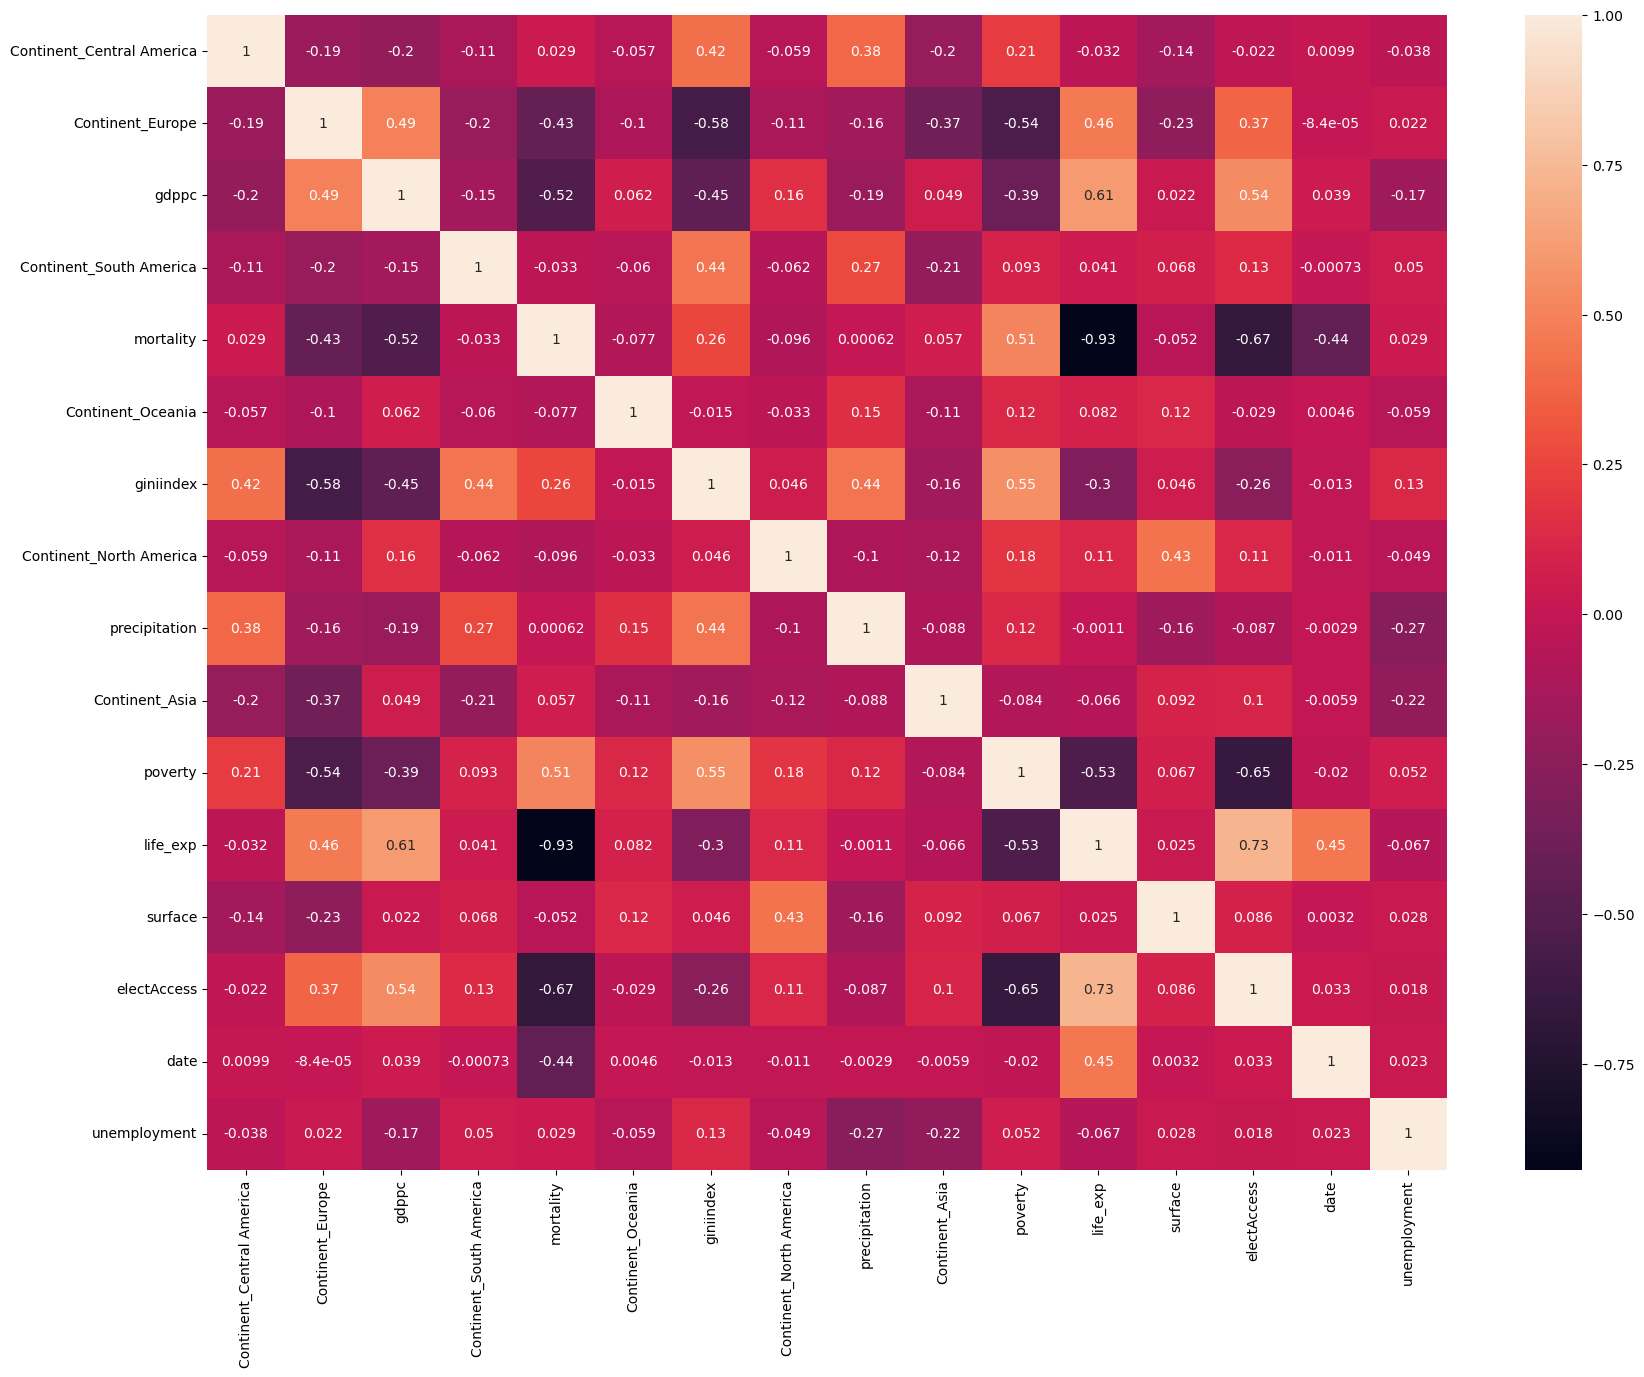

In [32]:
#Looking at Multicolinearity
corr_matrix = coll_data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

In [33]:
#Cheking columns with our model
col_to_drop = []

In [34]:
X_train = X_train_all.drop(col_to_drop, axis = 1)
X_train.shape
X_test = X_test_all.drop(col_to_drop, axis = 1)
X_test

,Continent_Central America,Continent_Europe,gdppc,Continent_South America,mortality,Continent_Oceania,giniindex,Continent_North America,precipitation,Continent_Asia,poverty,life_exp,surface,electAccess,date,unemployment
0,0.0,1.0,0.428689,0.0,0.006824,0.0,0.154195,0.0,0.257271,0.0,0.164015,0.936129,0.001785,1.000000,0.852459,0.234163
1,0.0,0.0,0.033364,0.0,0.438158,0.0,0.319728,0.0,0.071976,0.0,0.561812,0.472002,0.146553,0.348416,0.180328,0.460493
2,0.0,0.0,0.112531,0.0,0.201847,0.0,0.251701,0.0,0.199541,1.0,0.335373,0.761824,0.000611,0.994900,1.000000,0.268200
3,0.0,0.0,0.016274,0.0,0.123401,0.0,0.498866,0.0,0.360626,0.0,0.241126,0.673495,0.014127,0.409849,0.967213,0.094233
4,0.0,0.0,0.038433,0.0,0.590560,0.0,0.634165,0.0,0.307862,0.0,0.388005,0.407682,0.072914,0.347904,0.639344,0.397534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,0.0,0.0,0.365009,0.0,0.028718,0.0,0.372667,0.0,0.033179,1.0,0.320047,0.848958,0.018101,1.000000,0.786885,0.127009
1801,0.0,1.0,0.296534,0.0,0.004265,0.0,0.133787,0.0,0.204507,0.0,0.109088,0.891422,0.004613,1.000000,0.819672,0.225969
1802,0.0,0.0,0.176651,1.0,0.198465,0.0,0.569374,0.0,0.177814,0.0,0.397797,0.712722,0.162613,0.967457,0.163934,0.147810
1803,0.0,0.0,0.029015,0.0,0.143588,1.0,0.524943,0.0,0.969583,0.0,0.466340,0.692640,0.027069,0.397287,0.885246,0.116609


In [35]:
#Running a model with the chosen features.

print("X_train:", X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",y_test.shape)
print("y_test:",y_test.shape)

X_train: (4209, 16)
y_train: (4209,)
X_test: (1805,)
y_test: (1805,)


In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(X_train, y_train)
print('TrainSet = ',clf.score(X_train, y_train))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.807080066524115
TestSet =  0.7850415512465374


In [37]:
y_train.value_counts()

Imigration    2108
Emigration    2101
Name: migrationtclass, dtype: int64

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [39]:
#Let´s see the confusion matrix in a clearest way.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]
    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))
        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""
    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')
    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False
    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    if title:
        plt.title(title)

In [40]:
predictions = clf.predict(X_test)

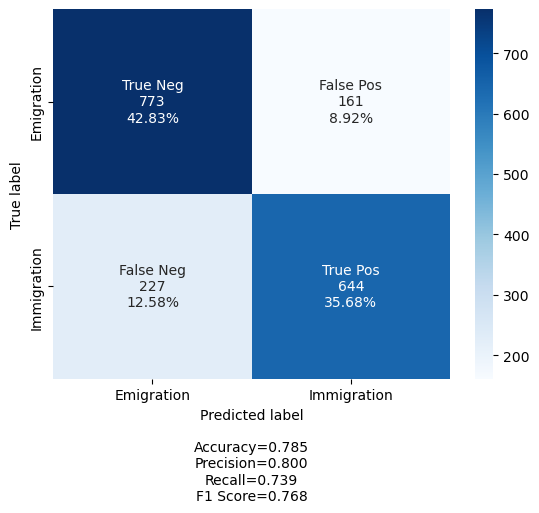

In [41]:
cf_matrix = confusion_matrix(y_test, predictions)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ["Emigration",'Immigration']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap=plt.cm.Blues)

In [42]:
pred_RF = clf.predict(X_test)

print('accuracy:', accuracy_score(y_test, pred_RF))
print("precision: ",precision_score(y_test,pred_RF, pos_label="Emigration"))
print("recall: ",recall_score(y_test,pred_RF, pos_label="Emigration"))
print("f1: ",f1_score(y_test,pred_RF, pos_label="Emigration"))

accuracy: 0.7850415512465374
precision:  0.773
recall:  0.8276231263383298
f1:  0.7993795243019649


In [43]:
#Checking our predictions:
df=pd.DataFrame({'Actual':y_test, 'Predicted':pred_RF})
df

,Actual,Predicted
0,Imigration,Imigration
1,Emigration,Emigration
2,Emigration,Emigration
3,Imigration,Emigration
4,Imigration,Emigration
...,...,...
1800,Emigration,Imigration
1801,Imigration,Imigration
1802,Imigration,Emigration
1803,Imigration,Emigration


# Now we have a model, let's run ALL of the data to gain insights

In [44]:
X.dtypes

date               int64
country           object
Continent         object
gdppc            float64
inflation        float64
poverty          float64
mortality        float64
giniindex        float64
unemployment     float64
netMig           float64
refugee          float64
life_exp         float64
electAccess      float64
totalpop         float64
urbanpop         float64
surface          float64
CO2              float64
precipitation    float64
densitypop       float64
dtype: object

In [45]:
display(X)
display(y)

,date,country,Continent,gdppc,inflation,poverty,mortality,giniindex,unemployment,netMig,refugee,life_exp,electAccess,totalpop,urbanpop,surface,CO2,precipitation,densitypop
0,2021,Afghanistan,Asia,1516.305667,6.124620,42.166667,72.889437,37.134597,6.996000,-183672.0,66949.000000,47.684426,52.520487,40099462.0,10551772.0,652860.0,3182.000017,327.00000,61.421227
1,2020,Afghanistan,Asia,1968.341002,6.124620,42.166667,58.000000,37.134597,11.710000,166821.0,72278.000000,62.575000,97.699997,38972230.0,10142913.0,652860.0,3182.000017,327.00000,59.694621
2,2019,Afghanistan,Asia,2079.921861,2.302373,42.166667,60.100000,37.134597,6.996000,-8082.0,72227.000000,63.565000,97.699997,37769499.0,9727157.0,652860.0,6079.999924,327.00000,57.852371
3,2018,Afghanistan,Asia,2060.698973,0.626149,42.166667,62.300000,37.134597,6.996000,-47205.0,72228.000000,63.081000,96.616135,36686784.0,9353296.0,652860.0,6070.000172,327.00000,56.193953
4,2017,Afghanistan,Asia,2096.093111,4.975952,42.166667,64.800000,37.134597,11.180000,-47090.0,75927.000000,63.016000,97.699997,35643418.0,8999963.0,652860.0,4780.000210,327.00000,54.595806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,1964,Zimbabwe,Africa,2306.782048,77.520200,39.800000,134.200000,45.933333,6.418889,-10064.0,38480.166667,54.994000,37.192777,4310332.0,607412.0,390760.0,12707.000073,657.00000,11.030638
6010,1963,Zimbabwe,Africa,2306.782048,77.520200,39.800000,138.600000,45.933333,6.418889,-9369.0,38480.166667,54.549000,37.192777,4177931.0,567279.0,390760.0,12707.000073,657.00000,10.691808
6011,1962,Zimbabwe,Africa,2306.782048,77.520200,39.800000,142.900000,45.933333,6.418889,-8931.0,38480.166667,54.071000,37.192777,4049778.0,529792.0,390760.0,12707.000073,657.00000,10.363850
6012,1961,Zimbabwe,Africa,2306.782048,77.520200,39.800000,147.000000,45.933333,6.418889,-8582.0,38480.166667,53.619000,37.192777,3925952.0,503346.0,390760.0,12707.000073,657.00000,10.046965


0       Emigration
1       Imigration
2       Emigration
3       Emigration
4       Emigration
           ...    
6009    Emigration
6010    Emigration
6011    Emigration
6012    Emigration
6013    Emigration
Name: migrationtclass, Length: 6014, dtype: object

In [46]:
#Scale and encode ALL of the data for model

In [47]:
Xcat = X.select_dtypes(include=object)
Xnum = X.select_dtypes(include=np.number)
Xcat

,country,Continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
6009,Zimbabwe,Africa
6010,Zimbabwe,Africa
6011,Zimbabwe,Africa
6012,Zimbabwe,Africa


In [48]:
encoder = OneHotEncoder(drop='first').fit(Xcat)

cols = encoder.get_feature_names_out(input_features=Xcat.columns)

Xcat_encode = pd.DataFrame(encoder.transform(Xcat).toarray(),columns=cols)

Xcat_encode.reset_index(drop = True, inplace = True)
Xcat_encode

,country_Algeria,country_Angola,country_Argentina,country_Australia,country_Austria,country_Belgium,country_Bolivia,country_Brazil,country_Cameroon,country_Canada,...,country_Uruguay,"country_Venezuela, RB",country_Vietnam,country_Zimbabwe,Continent_Asia,Continent_Central America,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
transformer = MinMaxScaler().fit(Xnum)
Xnum_norm = transformer.transform(Xnum)
print(Xnum_norm.shape)
Xnum_scale = pd.DataFrame(Xnum_norm, index = Xnum.index, columns=Xnum.columns)
Xnum_scale.head()
Xnum_scale.reset_index(drop = True, inplace = True)

(6014, 17)


In [50]:
X = pd.concat([Xnum_scale,Xcat_encode], axis = 1)

In [51]:
X

,date,gdppc,inflation,poverty,mortality,giniindex,unemployment,netMig,refugee,life_exp,...,country_Uruguay,"country_Venezuela, RB",country_Vietnam,country_Zimbabwe,Continent_Asia,Continent_Central America,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1.000000,0.009690,0.000935,0.512353,0.193063,0.372667,0.208965,0.506765,0.015197,0.488549,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.983607,0.013747,0.000935,0.512353,0.152570,0.372667,0.350782,0.591074,0.016407,0.694765,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.967213,0.014748,0.000774,0.512353,0.158281,0.372667,0.208965,0.549002,0.016395,0.708475,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.950820,0.014575,0.000704,0.512353,0.164264,0.372667,0.208965,0.539592,0.016396,0.701772,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.934426,0.014893,0.000887,0.512353,0.171063,0.372667,0.334838,0.539619,0.017235,0.700872,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,0.065574,0.016783,0.003936,0.483597,0.359804,0.572184,0.191603,0.548526,0.008734,0.589777,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6010,0.049180,0.016783,0.003936,0.483597,0.371770,0.572184,0.191603,0.548693,0.008734,0.583615,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6011,0.032787,0.016783,0.003936,0.483597,0.383465,0.572184,0.191603,0.548798,0.008734,0.576995,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6012,0.016393,0.016783,0.003936,0.483597,0.394615,0.572184,0.191603,0.548882,0.008734,0.570735,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#keeping the same columns as before
X = X.drop(drop_list, axis = 1)   #dropping
X.shape

(6014, 16)

In [53]:
X = X[col_list]           #columns to keep -- top 25
X.shape

(6014, 16)

In [54]:
X = X.drop(col_to_drop, axis = 1)
X.shape

(6014, 16)

# Re-running Classifier with all the data

In [55]:
#Using the classifier

print('All data = ',clf.score(X,y))

All data =  0.7806784170269372


In [56]:
predictions = clf.predict(X)

In [57]:
#Let´s see the confusion matrix in a clearest way.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]
    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))
        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""
    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')
    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False
    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    if title:
        plt.title(title)

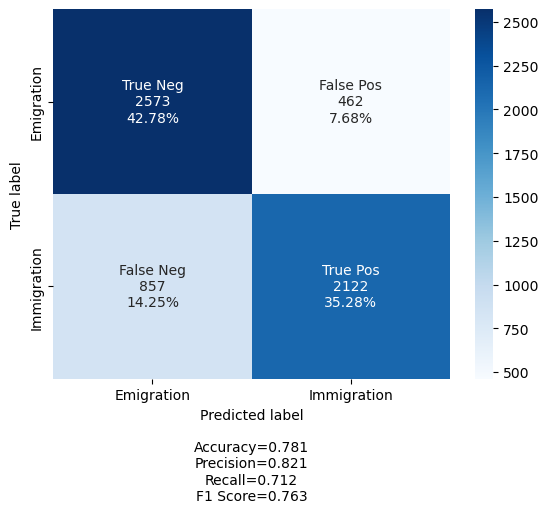

In [58]:
cf_matrix = confusion_matrix(y, predictions)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ["Emigration",'Immigration']
make_confusion_matrix(cf_matrix,
                      group_names=labels,
                      categories=categories,
                      cmap=plt.cm.Blues)

In [59]:
#I´m indicating the positive class with (pos_label=Emigration) because it was giving me an error
#In this case my positive class = Emigration = 0.

pred_RF = clf.predict(X)

print('accuracy:', accuracy_score(y, pred_RF))
print("precision: ",precision_score(y,pred_RF, pos_label="Emigration"))
print("recall: ",recall_score(y,pred_RF, pos_label="Emigration"))
print("f1: ",f1_score(y,pred_RF, pos_label="Emigration"))

accuracy: 0.7806784170269372
precision:  0.7501457725947522
recall:  0.8477759472817133
f1:  0.7959783449342616


In [60]:
#Reading the results

In [61]:
predict_y = clf.predict(X)


array = confusion_matrix(y, predict_y)
Q1 = array[0][0]
Q2 = array[0][1]
Q3 = array[1][0]
Q4 = array[1][1]
print(Q1)
print(Q2)
print(Q3)
print(Q4)

2573
462
857
2122


In [62]:
print('In the above plot we can see that there are    ',Q3,'    people of whom the model predicts they will be not Emigrants,')
print("when they actually would be Emigrants, AKA falsely predicted Immigrants.")
print('There are also   ', Q2 ,'    people of whom the model predicts they will be Emigrants, when they actually are not.')


In the above plot we can see that there are     857     people of whom the model predicts they will be not Emigrants,
when they actually would be Emigrants, AKA falsely predicted Immigrants.
There are also    462     people of whom the model predicts they will be Emigrants, when they actually are not.
